In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('haberman.csv')

#### Title: Haberman’s Survival Data
<!--   Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer. -->
<!-- Attribute Information: -->
<!-- Age of patient at the time of operation (numerical) -->
<!-- Patient’s year of operation (year — 1900, numerical) -->
<!-- Number of positive auxillary nodes detected (numerical) -->
<!-- Survival status (class attribute) : -->
<!-- 1 = the patient survived 5 years or longer -->
<!-- 2 = the patient died within 5 years -->

In [4]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [87]:
df.info()   
#there is no missing value in the set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Year_of_op       305 non-null    int64
 2   Auxiliary_nodes  305 non-null    int64
 3   Status           305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [88]:
#Since all the values are of integer type, then the 1 in the Status column can be changed to "Yes"
# and the 2 can be changed to "No".
df['Status']=df['Status'].map({1:'Yes',2:'No'})
df.head()

,Age,Year_of_op,Auxiliary_nodes,Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [89]:
# changing the names of the columns appropriately
df.rename(columns={'30':"Age",'64':"Year_of_operation",'1':"Auxiliary_nodes"
                      ,'1.1':"Status"},inplace=True)
df

,Age,Year_of_op,Auxiliary_nodes,Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes
...,...,...,...,...
300,75,62,1,Yes
301,76,67,0,Yes
302,77,65,3,Yes
303,78,65,1,No


In [39]:
df=df.reset_index()
df=df.drop(['index'],axis=1)
df=df.drop(['level_0'],axis=1)

In [26]:
df=df.drop(['index'],axis=1)
df

,Year_of_op,Auxiliary_nodes,Status
Age,,,
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
...,...,...,...
75,62,1,1
76,67,0,1
77,65,3,1


In [40]:
#How many data points and features?
df.shape

(305, 4)

In [41]:
# The names of the columns of the dataframe are:
df.columns

Index(['Age', 'Year_of_op', 'Auxiliary_nodes', 'Status'], dtype='object')

In [90]:
df.head()

,Age,Year_of_op,Auxiliary_nodes,Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [91]:
#lets get all the basic numerical info about the dataset
df.describe()

,Age,Year_of_op,Auxiliary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [92]:
#How many people were alive for more than 5 years after the operation?
df['Status'].value_counts()

#looking at the result, the dataset clearly is imbalanced

Yes    224
No      81
Name: Status, dtype: int64

In [95]:
Status_yes=df.loc[df["Status"]=="Yes"]
Status_no=df.loc[df["Status"]=="No"]

In [97]:
Status_yes.head()

,Age,Year_of_op,Auxiliary_nodes,Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [99]:
Status_yes.describe()  # The basic numerical info about the the people
                       # who were alive after 5 years of operation

,Age,Year_of_op,Auxiliary_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [100]:
Status_no.describe()

,Age,Year_of_op,Auxiliary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


## Observations
* The difference between the mean of the no of auxiliary nodes used in the case of Status_yes and Status_no is about 5
* Not much differnece in the mean age and the year of operation of the classes

# Univariate Analysis

C:\Users\yashs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yashs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


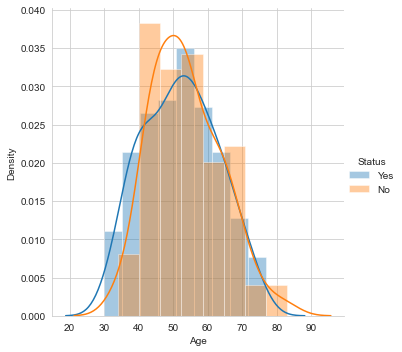

In [103]:
# PDF of Age of patient at the time of operation
sns.FacetGrid(df, hue="Status",height=5).map(sns.distplot,"Age").add_legend();
plt.show()

## Observations:
* It can be observed that there is a lot of overlapping here which means that there is no relation between the age at which the operation was done with the survival chances of a patient
* There are almost no patients between age of 20 to 30
* Patients of age 30 to 40 have got more chances of survival as comapred to 40 to 70.
* patients of age 60 to 83 have got equal chances of survival

C:\Users\yashs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yashs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


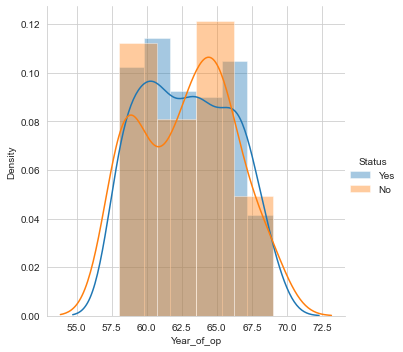

In [102]:
# PDF of Year of operation
sns.FacetGrid(df, hue="Status",height=5).map(sns.distplot,"Year_of_op").add_legend();
plt.show()

## Observations
+ Here also, there is a lot of overlapping to conclude anything 
+ In the year 1960 and 1965, more operations failed as comapred to being successful 

C:\Users\yashs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yashs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


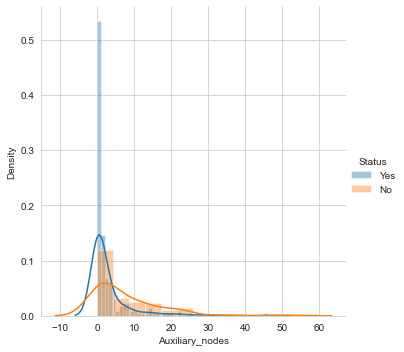

In [104]:
#PDF of No of Auxiliary Nodes 
sns.FacetGrid(df, hue="Status",height=5).map(sns.distplot,"Auxiliary_nodes").add_legend();
plt.show()

## Conclusion
+ There is a bit of overlapping
+ People who survived after 5 years of operation had got less no of auxiliary nodes as comapred to people who died within 5 yeras of operation

# CDF

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


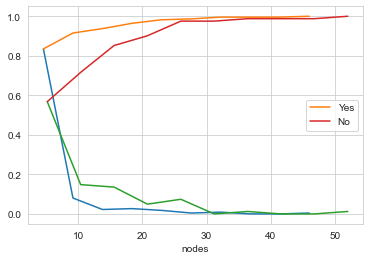

In [107]:
counts1, bin_edges1 = np.histogram(Status_yes['Auxiliary_nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(Status_no['Auxiliary_nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

## Conclusion
+ 83.48% of people who have survived have nodes in the range of 0-4.6

## Box plot and violin plots

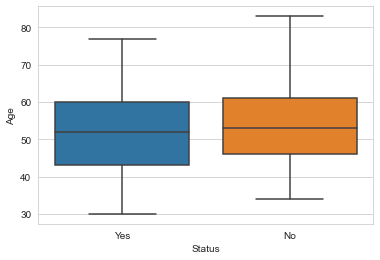

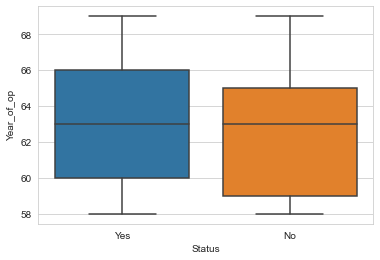

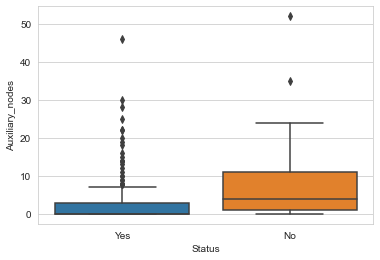

In [111]:
sns.boxplot(x="Status",y="Age",data=df)
plt.show()
sns.boxplot(x="Status",y="Year_of_op",data=df)
plt.show()
sns.boxplot(x="Status",y="Auxiliary_nodes",data=df)
plt.show()


In [116]:
 # Violin plots--> combo of PDF and boxplots

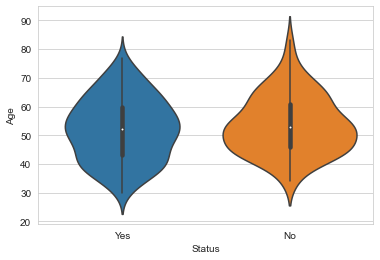

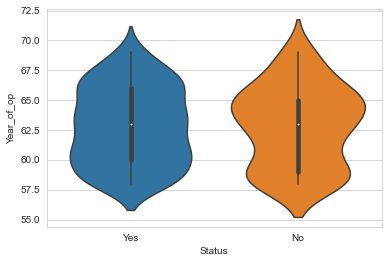

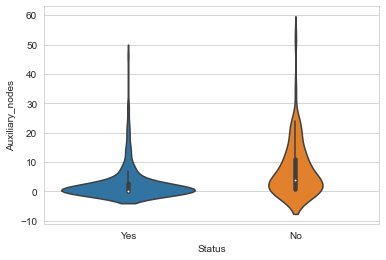

In [115]:
sns.violinplot(x="Status",y="Age",data=df) 
plt.show()
sns.violinplot(x="Status",y="Year_of_op",data=df) 
plt.show()
sns.violinplot(x="Status",y="Auxiliary_nodes",data=df) 
plt.show()

## Observations:
+ Observations are similar to the ones observed in the above plots

# Bi-variate Analysis

## Pair plot

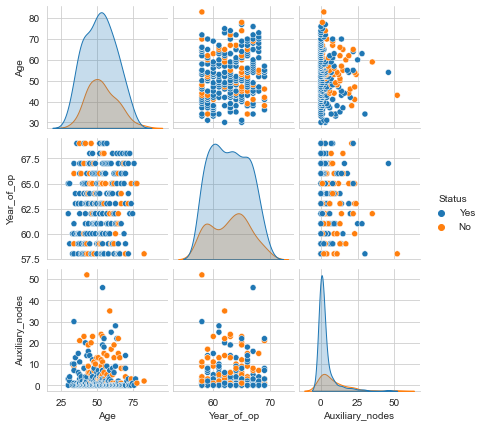

In [110]:
#pairplot to understand relationship between pairs of variables
sns.pairplot(df,hue="Status",height=2)
plt.show()

##  Conclusion
+ From the age vs Auxiliary_nodes plot, the patients with 0 auxiliary nodes have more chances of survival irrespective of their age

## 2-D scatter plot

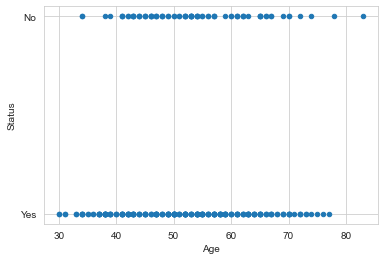

In [108]:
df.plot(kind="scatter",x="Age",y="Status");
plt.show()


# We don't seem to gain any valuable insights from scatter plot too.

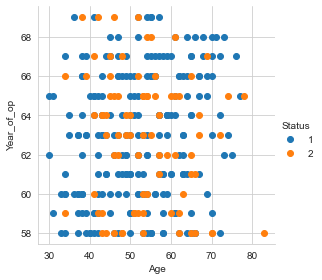

In [68]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Status",height=4)\
.map(plt.scatter,"Age","Year_of_op")\
.add_legend();
plt.show();

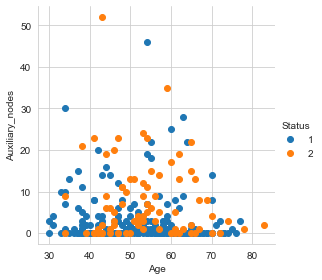

In [69]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Status",height=4)\
.map(plt.scatter,"Age","Auxiliary_nodes")\
.add_legend();
plt.show();

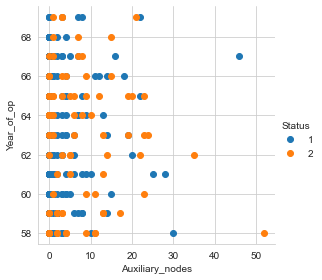

In [70]:
sns.set_style("whitegrid");
sns.FacetGrid(df,hue="Status",height=4)\
.map(plt.scatter,"Auxiliary_nodes","Year_of_op")\
.add_legend();
plt.show();

# MultiVariate Analysis

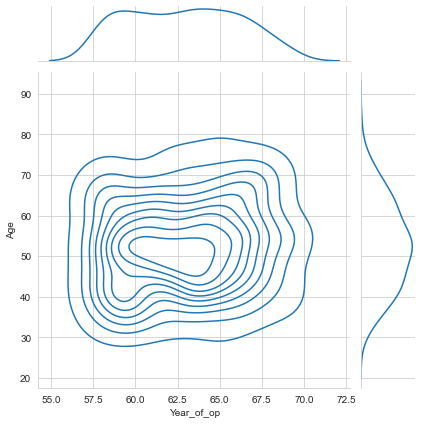

In [120]:
# Contour plot
sns.jointplot(x = 'Year_of_op', y = 'Age', data = df, kind = 'kde')
plt.show()

## Observations
+ From the years of 1960 to 64, there were more operations done in the age group of 45 to 55.

# Conclusions:
+ There is no specific relationship between the age of the patient and the survival chances of the patient , yet the chances of survival of patients of age less than 35 is more as compared to others.
+ Survival chances is inversely proportional to the no of auxiliary nodes the patient had. Also, having no auxiliary nodes does not neccessarily mean that the patient will always survive.
